# Wigner-Ville Distribution

## Functions
### Interpolation
### Hilbert transform
### Wigner-Ville distribution

In [1]:
function interp_da(x)
  N = length(x)::Int;
  N_over_2 = convert(Int, N/2);

  x_fft = fft(x);
  y_fft = zeros(Complex{Float64}, 2*N);
  y_fft[1:N_over_2-1] = 2*x_fft[1:N_over_2-1];
  y_fft[3*N_over_2+1:2*N] = 2*x_fft[N_over_2+1:N];
  y_fft[N_over_2] = x_fft[N_over_2];
  y_fft[3*N_over_2] = x_fft[N_over_2];

  y = ifft(y_fft);
  return y
end;

function Hilbert_da(x)
  N = length(x);
  x_fft = fft(x);
  N_over_2 = convert(Int, N/2);
  x_fft[N_over_2:end] = 0;
  x_fft[1:N_over_2] = 2*x_fft[1:N_over_2];
  x1 = ifft(x_fft);
  return x1
end;

function WVD_da(x)
  N = length(x)::Int;
  y = interp_da(x);
  y = Hilbert_da(y);
  yy = [y;y;y];
  yy[1:2*N] = 0;
  yy[4*N+1:end] = 0;
  W = zeros(Complex{Float64}, 2*N,N);
  for n = 1:N
    for p = 0:(2*N-1)
      W[p+1,n] = yy[2*n+p-N+2*N] * conj(yy[2*n-p+N+2*N]);
    end
  end
  W = W[N+1:end,:];
  WW = real(fft(W,1));
  return WW
end;

## Numerical Experiment
### Background parameters
Here are some test signals:

In [2]:
using PyPlot
plt = PyPlot;

In [3]:
Fs = 100; # Sampling Frequency
N = 200; # Length of the signal
T = 1/Fs;
t = 0:T:(N-1)*T;
fre = linspace(0,Fs,N+1); fre = fre[1:N];

In [4]:
function plot_signal_tfr(t, fre, x, W);
    fig = plt.figure("pyplot_subplot", figsize=(10,4));
    plt.subplot(121);
    plt.plot(t, x);
    xlim([t[1], t[end]]); ylim([1.3*minimum(real(x))-0.1, 1.3*maximum(real(x))+0.1])
#    ------------------------------ 
    plt.subplot(122);
    plt.pcolor(t, fre, W, cmap=ColorMap("magma"));
    colorbar();
end;

$x = sin(2\pi \times 20 t)$.

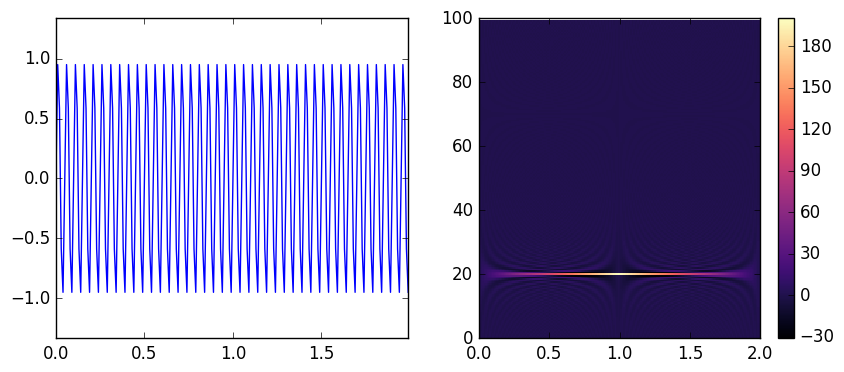

In [5]:
x = sin(2*pi*20*t);
W = WVD_da(x);
plot_signal_tfr(t, fre, x, W);

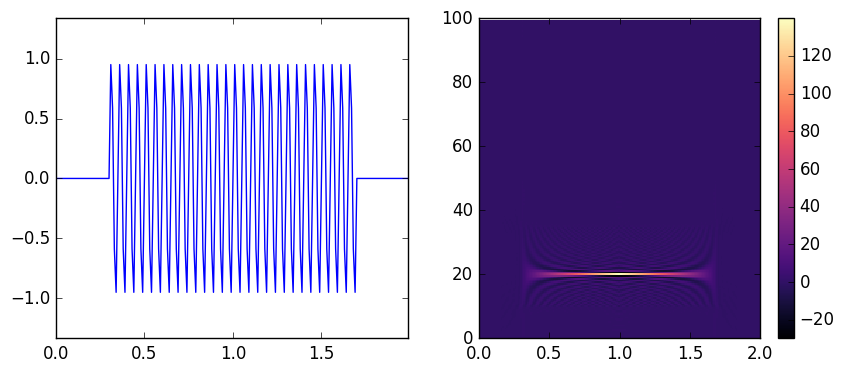

In [6]:
x = sin(2*pi*20*t);
x[1:30] = 0; x[171:end] = 0;
W = WVD_da(x);
plot_signal_tfr(t, fre, x, W);

$x_2 = \delta(t-0.4)$.

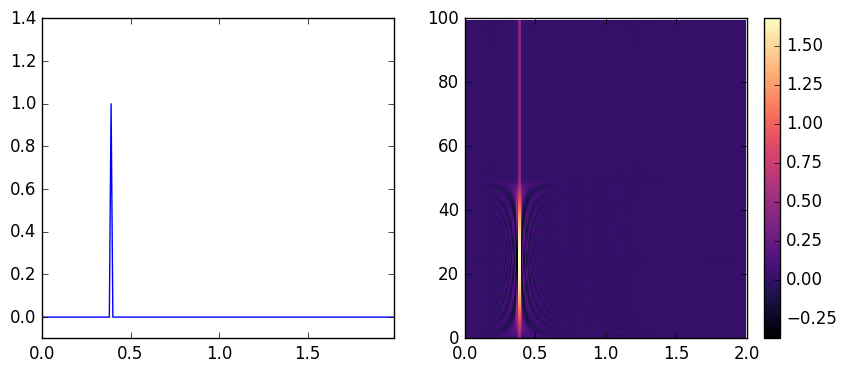

In [7]:
x = zeros(N); x[40] = 1;
W = WVD_da(x);
plot_signal_tfr(t, fre, x, W);

$x_3 = sin(2\pi\times 10 t^2)$.

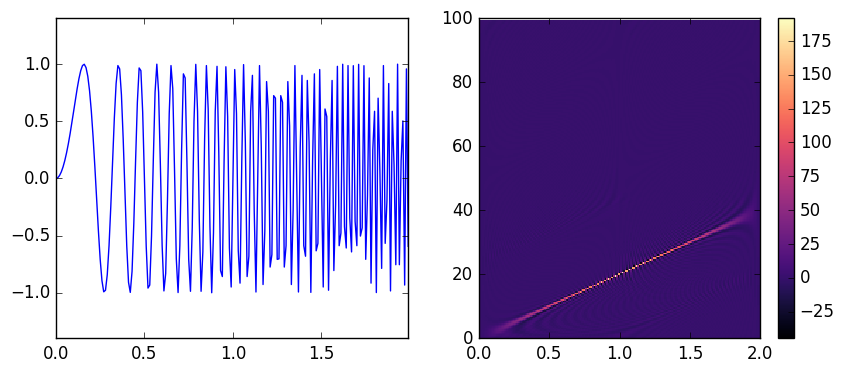

In [8]:
x = sin(2*pi*10*t.^2);
W = WVD_da(x);
plot_signal_tfr(t, fre, x, W);

$x = \exp(2\pi\mathrm{i}\times 20t)\frac{1}{(\sigma^2\pi)} \exp (\frac{-(t-1)^2}{2\sigma^2}), \quad \sigma = 0.2 $.

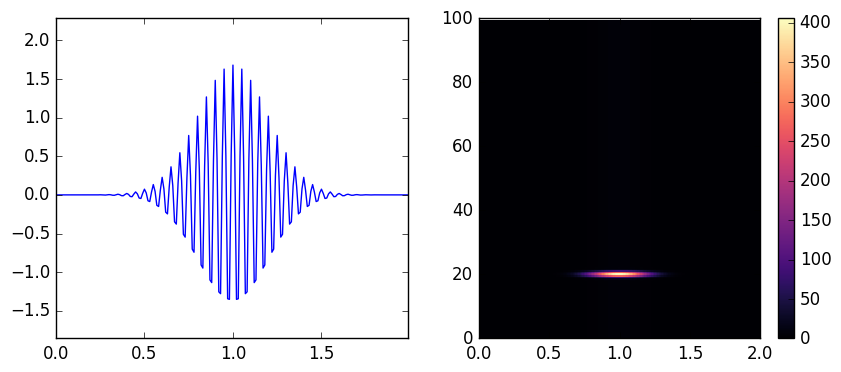

In [9]:
sigma = 0.2;
x = (sigma^2*pi)^(-1/4) * exp(-1 * (t-1).^2 / (2*sigma^2));
x = x .* exp(1im*2*pi*20*t);
W = WVD_da(x);
plot_signal_tfr(t, fre, x, W);

$x = \sin(2\pi\times 20t) + \sin(2\pi\times 10t^2)$.

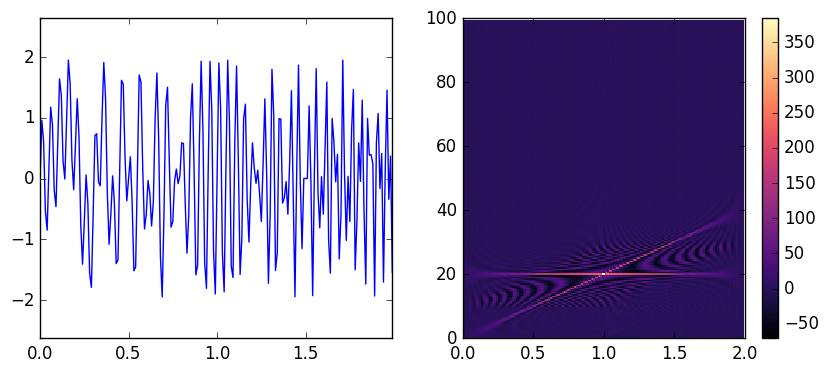

In [10]:
x = sin(2*pi*20*t) + sin(2*pi*10*t.^2);
W = WVD_da(x);
plot_signal_tfr(t, fre, x, W);

$x = \exp(2\pi\mathrm{i}\times 20t)\frac{1}{(\sigma^2\pi)} \exp (\frac{-(t-0.5)^2}{2\sigma^2}) + \exp(2\pi\mathrm{i}\times 40t)\frac{1}{(\sigma^2\pi)} \exp (\frac{-(t-1.5)^2}{2\sigma^2}), \quad \sigma = 0.2 \ $.

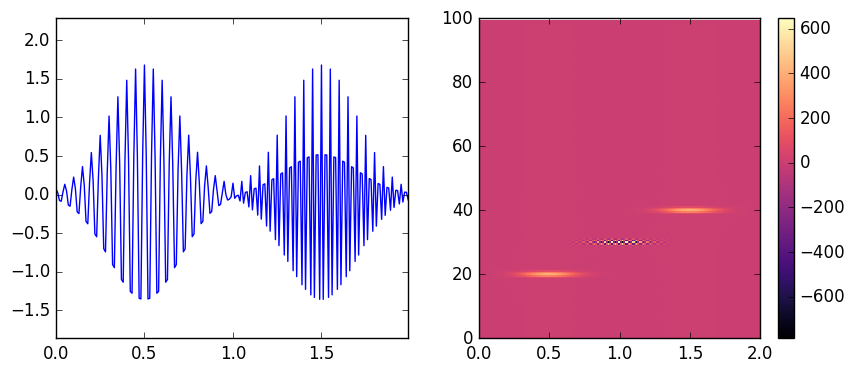

In [11]:
sigma = 0.2;
x = (sigma^2*pi)^(-1/4) * exp(-1 * (t-0.5).^2 / (2*sigma^2)).* exp(1im*2*pi*20*t) + (sigma^2*pi)^(-1/4) * exp(-1 * (t-1.5).^2 / (2*sigma^2)).* exp(1im*2*pi*40*t);
W = WVD_da(x);
plot_signal_tfr(t, fre, x, W);